In [ ]:
!pip install opendatasets --quiet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data')

Dataset URL: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset


100%|██████████| 187k/187k [00:00<00:00, 17.8MB/s]

In [ ]:
import os

In [ ]:
os.listdir('bank-customer-churn-dataset')

['Bank Customer Churn Prediction.csv']

In [ ]:
df = pd.read_csv('bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Exploratory Data Analysis

In [ ]:
df.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='credit_score', ylabel='Count'>

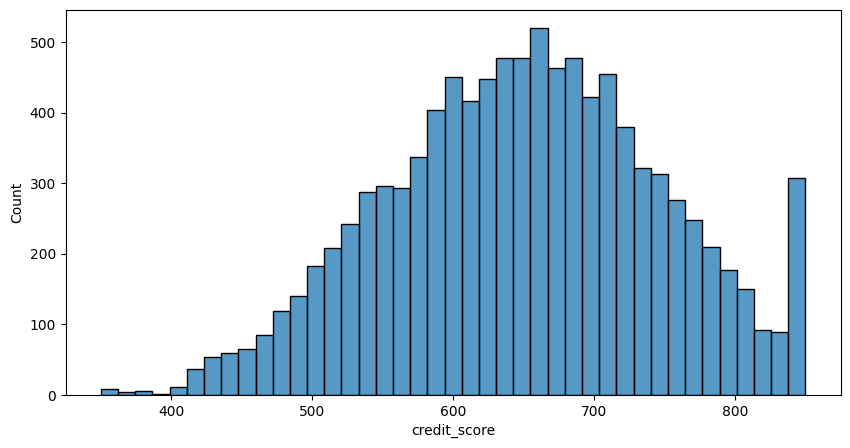

In [ ]:
#Credit Score Ditribution
fig = plt.figure(figsize=(10,5))
sns.histplot(df['credit_score'])

Credit Score has a normal distribution

<Axes: xlabel='age', ylabel='Count'>

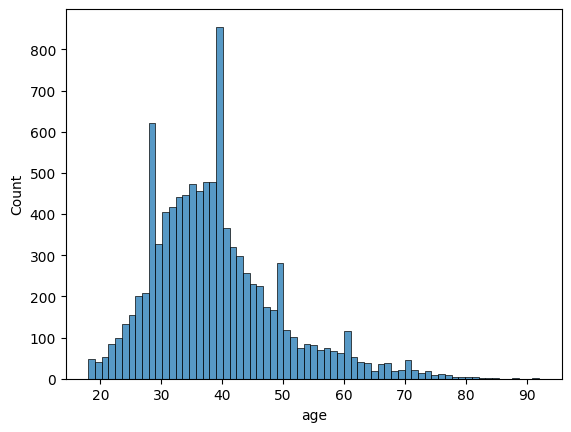

In [ ]:
sns.histplot(df['age'])

<Axes: xlabel='balance', ylabel='Count'>

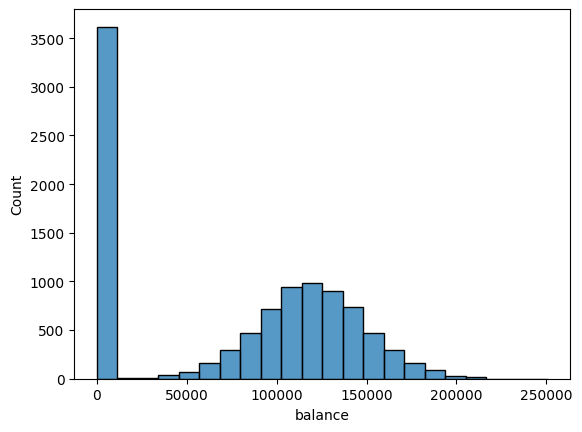

In [ ]:
sns.histplot(df['balance'])

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(df, x='age', color='churn')
fig.show()

Both churners and not churners are distributed normally but among each age group we see that those who churned are less then those who didn't

In [ ]:
fig = px.histogram(df, x='estimated_salary', color='churn')
fig.show()

In [ ]:
fig = px.histogram(df, x='balance', color='churn')
fig.show()

In [ ]:
fig = px.histogram(df, x='gender', color='churn')
fig.show()

There are more females who churn then males this could be sample bias, we will check that.

<Axes: xlabel='gender', ylabel='Count'>

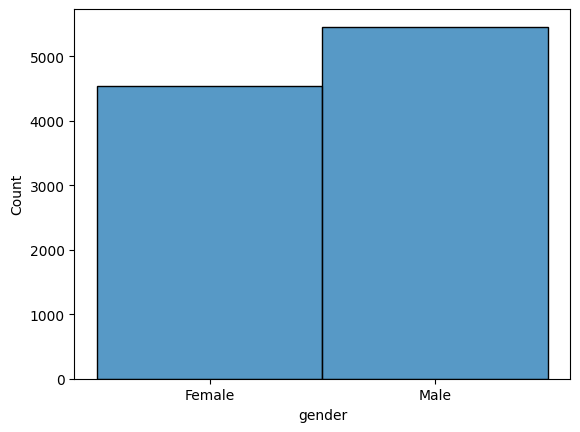

In [ ]:
sns.histplot(df['gender'])

As expected the sample has more males then females.

<Axes: xlabel='country', ylabel='Count'>

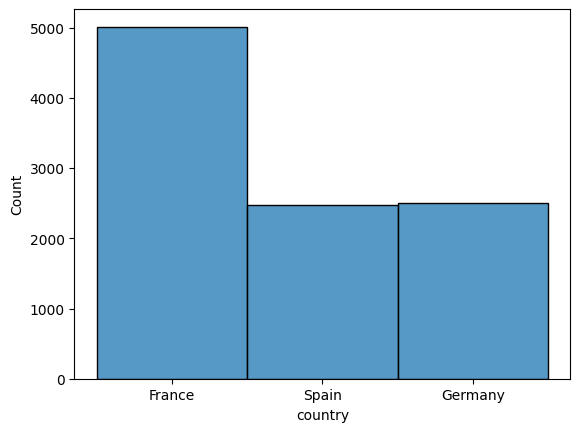

In [ ]:
sns.histplot(df['country'])

In [ ]:
fig = px.histogram(df, x='country', color='churn')
fig.show()

**Correlation Analysis**

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

In [ ]:
correlation = df[numeric_cols].corr()['churn'].sort_values(ascending=False)
correlation = correlation.drop('churn')
print(correlation)

age                 0.285323
balance             0.118533
estimated_salary    0.012097
customer_id        -0.006248
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Training

In [ ]:
from sklearn.model_selection import train_test_split

**Encoding Categorical Features**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
encoded_categorical = encoder.fit_transform(df[categorical_cols])

In [ ]:
encoded_cat_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

In [ ]:
numeric_cols = numeric_cols.drop('churn', errors='ignore')

In [ ]:
target = 'churn'
X = pd.concat([df[numeric_cols], encoded_cat_df], axis=1)
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (8000, 12)
X_test shape: (2000, 12)


# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

**Evaluation**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Model Performance:
Accuracy: 0.79
Precision: 0.33
Recall: 0.07
F1 Score: 0.11
Confusion Matrix:
[[1553   54]
 [ 367   26]]


Our accuracy score is 79% which isn't that great

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

**Evaluation**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Random Forest Model Performance:
Accuracy: 0.87
Precision: 0.75
Recall: 0.48
F1 Score: 0.58
Confusion Matrix:
[[1545   62]
 [ 205  188]]


Our score has singificantly increased from 79% to 87% with 75% precision.

# Hyperaparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='accuracy')

In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}
Best Cross-Validation Score: 0.8641249999999999


**Evaluation using best parameters**

In [ ]:
best_rf_model = random_search.best_estimator_

In [ ]:
y_pred = best_rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Best Model Performance on Test Set:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Best Model Performance on Test Set:
Accuracy: 0.86
Precision: 0.73
Recall: 0.46
F1 Score: 0.56
Confusion Matrix:
[[1542   65]
 [ 214  179]]


Our accuracy score went down by 1% and precision by 2%. this could be due to overfitting or underfitting. let's try different parameters.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=300, min_samples_split=10,
                          min_samples_leaf=4, max_features='log2',
                          max_depth=None ,random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=300, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Random Forest Model Performance:
Accuracy: 0.86
Precision: 0.75
Recall: 0.45
F1 Score: 0.56
Confusion Matrix:
[[1547   60]
 [ 215  178]]


After trying different parameters, our initial Random Forest still performs slighly better.

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5)

In [ ]:
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.8605 0.871  0.862  0.8685 0.861 ]


The variation between scores is low, with the min being 86.1 and the max being 87.1. this suggest the model is faitly stable and consistent actoss the 5 folds

In [ ]:
train_score = rf_model.score(X_train, y_train)
print("Training Score:", train_score)

Training Score: 0.91


Increasing min_samples-split, min_samples_leaf and restricting max_depth, lowered the training score from 100% to 91% mitigating overfitting.

Our cross validation scores also improved slightly. with the min now being 86% instead of 85%

**Learning Curve**

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy')

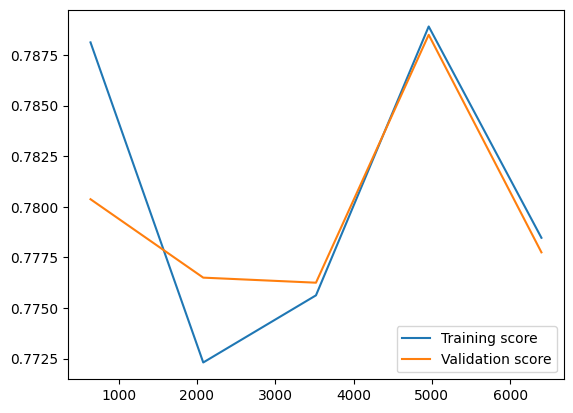

In [ ]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation score')
plt.legend()
plt.show()

It looks our model struggled to learn with lower samples, but after around 3500, it picked up and validation and training scores will eventually intersect.

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [ ]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gb_model.predict(X_test)

**Evaluation**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8655
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



gb model is more confident predicting 0 then 1

In [ ]:
training_score = gb_model.score(X_train, y_train)
print(training_score)

0.87525


Our training score is reasonable consideting the classification report.

**Feature Importance**

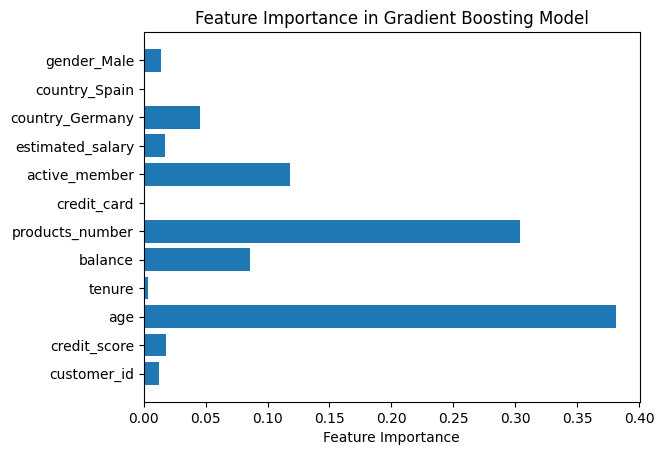

In [ ]:
import matplotlib.pyplot as plt
plt.barh(X_train.columns, gb_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()

Age is the most significant feature, followed by product_number and active_member

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.01,
    'max_depth': 3
}

In [ ]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]
bst = xgb.train(params, dtrain, num_boost_round=1000, evals=evallist, early_stopping_rounds=50)

[0]	eval-logloss:0.49761	train-logloss:0.50806
[1]	eval-logloss:0.49537	train-logloss:0.50574
[2]	eval-logloss:0.49319	train-logloss:0.50348
[3]	eval-logloss:0.49106	train-logloss:0.50128
[4]	eval-logloss:0.48900	train-logloss:0.49909
[5]	eval-logloss:0.48698	train-logloss:0.49700
[6]	eval-logloss:0.48501	train-logloss:0.49496
[7]	eval-logloss:0.48308	train-logloss:0.49298
[8]	eval-logloss:0.48120	train-logloss:0.49104
[9]	eval-logloss:0.47936	train-logloss:0.48915
[10]	eval-logloss:0.47757	train-logloss:0.48725
[11]	eval-logloss:0.47582	train-logloss:0.48546
[12]	eval-logloss:0.47411	train-logloss:0.48371
[13]	eval-logloss:0.47242	train-logloss:0.48198
[14]	eval-logloss:0.47078	train-logloss:0.48031
[15]	eval-logloss:0.46918	train-logloss:0.47867
[16]	eval-logloss:0.46761	train-logloss:0.47707
[17]	eval-logloss:0.46608	train-logloss:0.47551
[18]	eval-logloss:0.46459	train-logloss:0.47390
[19]	eval-logloss:0.46311	train-logloss:0.47240
[20]	eval-logloss:0.46168	train-logloss:0.47093
[2

In [ ]:
y_pred = bst.predict(dtest)
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8635


In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8655
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



# Prediction using new features

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X_train.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
9254,15601116,686,32,6,0.00,2,1,1,179093.26,0.0,0.0,1.0
1561,15766374,632,42,4,119624.60,2,1,1,195978.86,1.0,0.0,1.0
1670,15716994,559,24,3,114739.92,1,1,0,85891.02,0.0,1.0,1.0
6087,15730759,561,27,9,135637.00,1,1,0,153080.40,0.0,0.0,0.0
6669,15797900,517,56,9,142147.32,1,0,0,39488.04,0.0,0.0,1.0


In [ ]:
new_input = pd.DataFrame({
    'customer_id': [15647312],
    'credit_score': [700],
    'age': [45],
    'tenure': [2],
    'balance': [800000],
    'products_number': [4],
    'credit_card': [1],
    'active_member': [1],
    'estimated_salary': [60000],
    'country_Germany': [0],
    'country_Spain': [0],
    'gender_Male': [1]

})

**Predictions using each model**

In [ ]:
# Predict with Random Forest
y_pred_rf = rf_model.predict(new_input)

# Predict with Gradient Boosting
y_pred_gb = gb_model.predict(new_input)

# Predict with XGBoost
y_pred_xgb = xgb_model.predict(new_input)

# Optionally, display the predictions
print("Logistic Regression with Random Forest predictions:", y_pred_rf)
print("Gradient Boosting predictions:", y_pred_gb)
print("XGBoost predictions:", y_pred_xgb)

Logistic Regression with Random Forest predictions: [1]
Gradient Boosting predictions: [1]
XGBoost predictions: [1]


All models predicted 1, Let's try other values

In [ ]:
new_input = pd.DataFrame({
    'customer_id': [15647314],
    'credit_score': [779],
    'age': [24],
    'tenure': [1],
    'balance': [3500],
    'products_number': [3],
    'credit_card': [1],
    'active_member': [1],
    'estimated_salary': [40000],
    'country_Germany': [0],
    'country_Spain': [0],
    'gender_Male': [0]

})

# Predict with Random Forest
y_pred_rf = rf_model.predict(new_input)

# Predict with Gradient Boosting
y_pred_gb = gb_model.predict(new_input)

# Predict with XGBoost
y_pred_xgb = xgb_model.predict(new_input)

# Optionally, display the predictions
print("Logistic Regression with Random Forest predictions:", y_pred_rf)
print("Gradient Boosting predictions:", y_pred_gb)
print("XGBoost predictions:", y_pred_xgb)

Logistic Regression with Random Forest predictions: [0]
Gradient Boosting predictions: [0]
XGBoost predictions: [0]


All models predicted 0

# Conclusion

# *Business Insights Summary:*
*   **Age as a Key Indicator of Churn:** Age is a critical factor in predicting churn, suggesting younger customers might be more likely to leave, while older customers show more loyalty.

*    **Salary vs. Age:** Despite expectations that salary would be more influential, age proved to be a stronger predictor, indicating lifestyle and life stage might drive churn rather than financial factors alone.

*     **Targeted Retention Strategies:** Businesses should tailor retention efforts based on age demographics, offering loyalty programs for older customers and more flexible options for younger ones.

*     **Potential for Segment-Specific Offerings:** Age-based segmentation could help create customized products or promotions that cater to different customer needs, improving retention.

*     **Churn Prevention Actions:** Businesses should focus on proactive engagement with younger customers and offer stability and added value to retain older ones.

*     **Improved Customer Segmentation:** Focusing on age demographics can enhance customer segmentation and more effectively target marketing and retention efforts.
*     **Churn Analysis for Long-Term Strategy:** Long-term strategies should adapt to the evolving needs of different age groups, leveraging data for more informed business decisions.

# *Limitations of the Data:*

*   **Age Distribution Bias:** The dataset's age distribution is skewed toward the 20-50 age range, particularly 30-40, which could lead to overemphasizing age as a predictor of churn.

*    **Potential Misinterpretation of Age as a Strong Predictor:** The prominence of the 30-40 age group in the data may distort the true relationship between age and churn, limiting the model's ability to generalize to other age groups.

*   **Addressing the Limitation:** Techniques like resampling, stratified sampling, or age binning can help balance the dataset and ensure a more accurate and generalized model.